In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

In [66]:
king = pd.read_excel("..\data\king_county_home_sales.xlsx", index_col= "Unnamed: 0" )
king.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_ord,condition_ord,grade_ord,age
9853,2719100400,2014-09-12,499950,3,1.75,1340,6250,1.0,0,1090,...,0,98136,47.5427,-122.386,1550,1755,0,3,4,74
5733,2025700080,2014-07-10,265000,3,2.50,1530,6000,2.0,0,1530,...,0,98038,47.3487,-122.036,1360,6000,0,3,4,24
14228,1922059010,2015-01-21,140000,2,1.00,1080,6052,1.0,0,1080,...,0,98030,47.3857,-122.215,1810,7830,0,4,3,107
9810,3598600049,2014-10-03,124000,1,0.75,840,7203,1.5,0,840,...,0,98168,47.4756,-122.301,1560,8603,0,2,3,66
1070,5144000036,2014-05-27,360000,3,1.00,1050,9206,1.5,0,1050,...,0,98125,47.7071,-122.301,1380,6384,0,2,4,61
7105,2489200250,2015-04-30,528000,3,2.00,1560,6300,1.0,0,1560,...,0,98126,47.5407,-122.379,1620,6300,0,2,4,91
19974,7234601140,2014-11-13,685000,3,2.25,1710,1193,2.0,0,1140,...,0,98122,47.6173,-122.310,1510,1193,0,2,6,1
1311,2473251180,2014-12-17,255000,3,1.00,1180,13650,1.0,0,1180,...,0,98058,47.4551,-122.154,1460,11730,0,3,4,48
16627,3826500290,2015-04-24,339000,3,2.25,1970,7210,1.0,0,1380,...,0,98030,47.3821,-122.171,1970,7350,0,3,5,37
920,4046500320,2015-01-20,342000,3,1.75,1660,16275,2.0,0,1660,...,0,98014,47.6903,-121.915,1520,16275,0,2,4,25


Here is a first attempt at a simple linear regression model using the sqft_living room of a home to model

In [67]:
# price as a function of sqfr_living room, this is just a pedigocial tool and will serve as a basis

price_model = LinearRegression()
price_model.fit(king[ ['sqft_living'] ], king['price'])
print(price_model.coef_, price_model.intercept_)

[280.86301436] -43988.89219422743


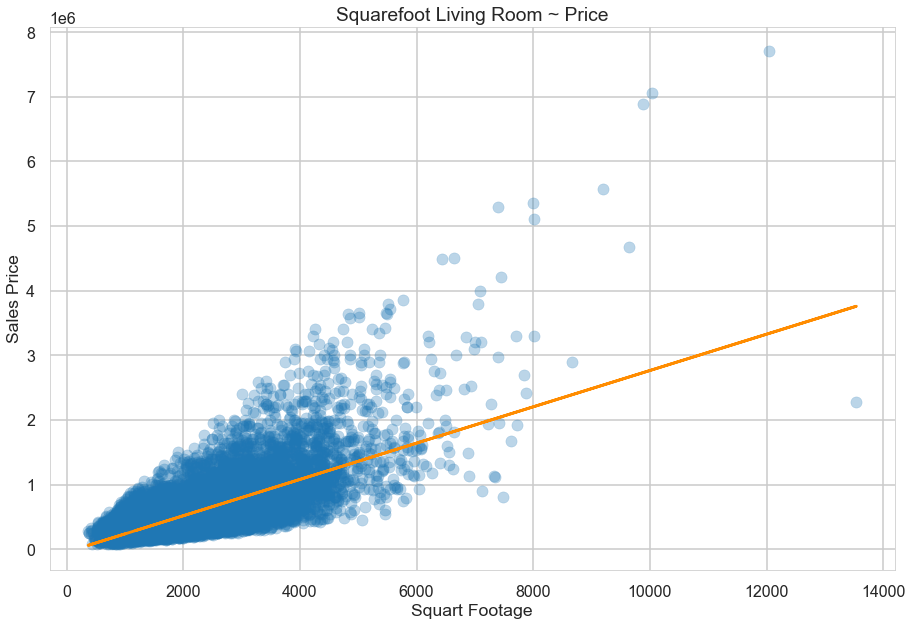

In [68]:
# plot fit
plt.scatter(king.sqft_living, king.price, alpha=0.3)
plt.plot(king.sqft_living, price_model.predict(king[['sqft_living']]), c='darkorange')
plt.title("Squarefoot Living Room ~ Price")
plt.xlabel("Squart Footage")
plt.ylabel("Sales Price")
plt.tight_layout()
plt.show()

In [69]:
# sklearn .score() method
score = price_model.score(king[['sqft_living']], king['price'])
print(f'scikit-learn r^2 score: {score}')

scikit-learn r^2 score: 0.49268789904035093


Now it is time for a multi linear regression:

In [70]:
king.columns # calling all columns in order to determine what subset of columns we will use for our models
features = king[['bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'floors', 'waterfront', 'sqft_above',
                 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15',
                 'sqft_lot15', 'view_ord', 'condition_ord', 'grade_ord', 'age']]

In [71]:
# mulit model time: (all ~ price) decided to use all of the columns here except for yr_built since this column and age are redundant and zipcode since it is an arbitraruy number not relevant to our dataframe yet.

multi_model = LinearRegression()
multi_model.fit(features, king['price'])
print('trips | all features', multi_model.coef_, multi_model.intercept_)

trips | all features [-3.42605790e+04  4.27531614e+04  9.80402617e+01  1.26803386e-01
  1.06465701e+03  6.22515532e+05  8.10522535e+01  4.89410215e+01
  2.49145906e+01  5.58788496e+05 -1.19377193e+05  2.72198114e+01
 -3.98434433e-01  4.98907886e+04  3.14470025e+04  9.82703135e+04
  2.47747538e+03] -41675675.96921555


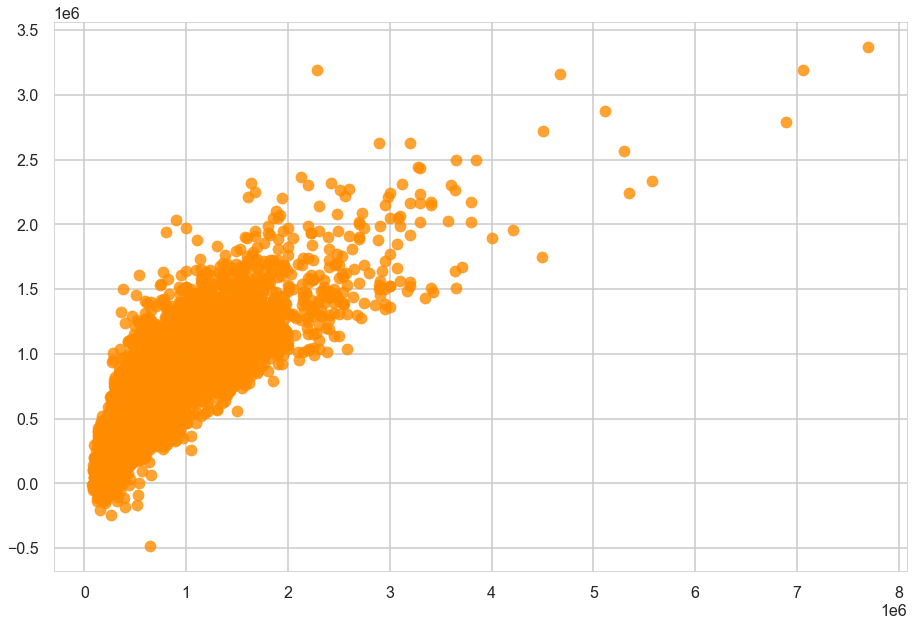

In [72]:
# plot the new (better?) model

plt.scatter(king.price, multi_model.predict(features), c = "darkorange", alpha = 0.8)

plt.tight_layout()

plt.show()

In [73]:
# score the new model
score = multi_model.score(features, king['price'])
print(f'scikit-learn r^2 score: {score}')

scikit-learn r^2 score: 0.6957340504142672


An r^2 score of 0.69 isn't bad but it isn't great either. Maybe we have some collinearity issues going on and we need to be more selective about our features.

In [74]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,view_ord,condition_ord,grade_ord,age
0,3,1.00,1180,5650,1.0,0,1180,0,0,47.5112,-122.257,1340,5650,0,2,4,60
1,3,2.25,2570,7242,2.0,0,2170,400,1991,47.7210,-122.319,1690,7639,0,2,4,64
2,2,1.00,770,10000,1.0,0,770,0,0,47.7379,-122.233,2720,8062,0,2,3,82
3,4,3.00,1960,5000,1.0,0,1050,910,0,47.5208,-122.393,1360,5000,0,4,4,50
4,3,2.00,1680,8080,1.0,0,1680,0,0,47.6168,-122.045,1800,7503,0,2,5,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,1530,0,0,47.6993,-122.346,1530,1509,0,2,5,6
21593,4,2.50,2310,5813,2.0,0,2310,0,0,47.5107,-122.362,1830,7200,0,2,5,1
21594,2,0.75,1020,1350,2.0,0,1020,0,0,47.5944,-122.299,1020,2007,0,2,4,6
21595,3,2.50,1600,2388,2.0,0,1600,0,0,47.5345,-122.069,1410,1287,0,2,5,11
